## Table of Contents

1. [Importing Libraries](#1)
2. [Reading Our Dataset](#2)
3. [Encoding Categorical Values](#3)
4. [Train Test Split](#4)
5.  [Feature Selection](#5)
6. [Random Forest Classifier](#6)

<a id=1></a>
### 1. Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix


pd.options.display.max_columns = None

import warnings 
warnings.filterwarnings('ignore')

### 2. Reading Our Dataset<a id=2></a>

In [25]:
df = pd.read_csv('preprocessed_churn.csv')

In [26]:
df = df.drop('Unnamed: 0',axis=1) ### drop redundant column 'Unnamed : 0'

In [27]:
df.head(2) # Reading Our Dataset

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


### 3. Encoding Categorical Values<a id=3></a>

In [28]:
X = df.iloc[:,:-1]
y = df['Churn']

In [29]:
X = pd.get_dummies(X,drop_first=True)

In [30]:
X

,Tenure,MonthlyCharges,TotalCharges,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7028,72,103.20,7362.90,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7029,11,29.60,346.45,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7030,4,74.40,306.60,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [31]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

### 4. Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
X_train

,Tenure,MonthlyCharges,TotalCharges,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6021,43,49.05,2076.20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
3404,3,53.40,188.70,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5474,55,77.75,4458.15,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
5515,45,54.65,2553.70,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
6328,55,100.90,5448.60,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,3,50.40,137.25,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5191,51,111.50,5703.25,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0
5226,9,81.15,784.45,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5390,50,19.75,989.05,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0


### 5. Feature Selection<a id =5><a/>

In [34]:
from sklearn.feature_selection import mutual_info_classif

In [35]:
mutual_classifier=mutual_info_classif(X_train,y_train)

In [36]:
data = pd.Series(mutual_classifier,index=X_train.columns).sort_values(ascending=False)

Text(0.5, 1.0, 'Mutual Information Scores')

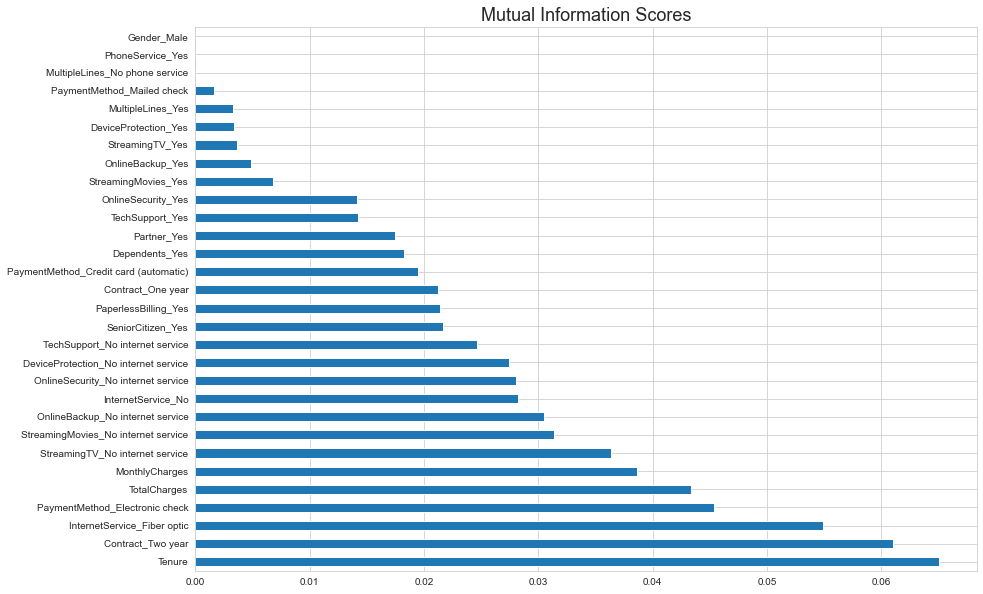

In [37]:
data.plot(kind='barh',figsize=(14,10)).set_title('Mutual Information Scores',fontsize=18)

#### We will use 5 most important features for our model to be built.

In [38]:
data.iloc[:5].index ## getting 10 index by mutual info

Index(['Tenure', 'Contract_Two year', 'InternetService_Fiber optic',
       'PaymentMethod_Electronic check', 'TotalCharges'],
      dtype='object')

In [16]:
#### Let's create a new train data with our filtered columns

In [39]:
X_train = X_train[['Tenure', 'Contract_Two year', 'PaymentMethod_Electronic check',
       'MonthlyCharges', 'TotalCharges']]

In [40]:
X_test = X_test[['Tenure', 'Contract_Two year', 'PaymentMethod_Electronic check',
       'MonthlyCharges', 'TotalCharges']]

### SMOTE

In [41]:
smote = SMOTE(random_state=27)

In [42]:
X_train,y_train = smote.fit_resample(X_train,y_train)

### Scaling Our Dataset

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [46]:
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred = lr.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.55      0.69      1033
           1       0.42      0.89      0.57       374

    accuracy                           0.64      1407
   macro avg       0.68      0.72      0.63      1407
weighted avg       0.80      0.64      0.66      1407



### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_model = RandomForestClassifier()

In [51]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred_rf = rf_model.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1033
           1       0.41      0.66      0.51       374

    accuracy                           0.66      1407
   macro avg       0.63      0.66      0.62      1407
weighted avg       0.73      0.66      0.68      1407



Text(0.5, 1.0, 'Correlation')

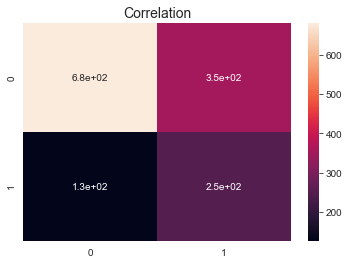

In [54]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True).set_title('Correlation',fontsize=14)

### Hyperparameter Tuning 

In [55]:
params = {'n_estimators':[50,60,65,70,80,90,100]}

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid_rf = GridSearchCV(rf_model,param_grid=params,n_jobs=2,verbose=2,cv=3)

In [58]:
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'n_estimators': [50, 60, 65, 70, 80, 90, 100]},
             verbose=2)

In [59]:
grid_rf.best_estimator_

RandomForestClassifier(n_estimators=80)

In [60]:
grid_rf_pred = grid_rf.predict(X_test)

In [61]:
print(classification_report(y_test,grid_rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.66      0.74      1033
           1       0.43      0.71      0.53       374

    accuracy                           0.67      1407
   macro avg       0.64      0.68      0.64      1407
weighted avg       0.74      0.67      0.69      1407



### Save Our Model Using Pickle

In [62]:
import pickle

In [63]:
pickle.dump(rf_model,open('model.pkl','wb'))

In [64]:
model = pickle.load(open('model.pkl','rb'))

In [74]:
model.predict([[5,0,0,,10]])[0]

0

In [ ]:
[['Tenure', 'Contract_Two year', 'PaymentMethod_Electronic check',
       'MonthlyCharges', 'TotalCharges']]